In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import matplotlib.style as style

In [2]:
# Load the dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Split the data into features (X) and labels (y)
X = data.data
y = data.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Shuffle the training data
X_train, y_train = shuffle(X_train, y_train)


In [3]:
# Create a neural network model
model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500)

# Train the model
model.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500)

In [4]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9385964912280702
Confusion Matrix:
[[36  7]
 [ 0 71]]


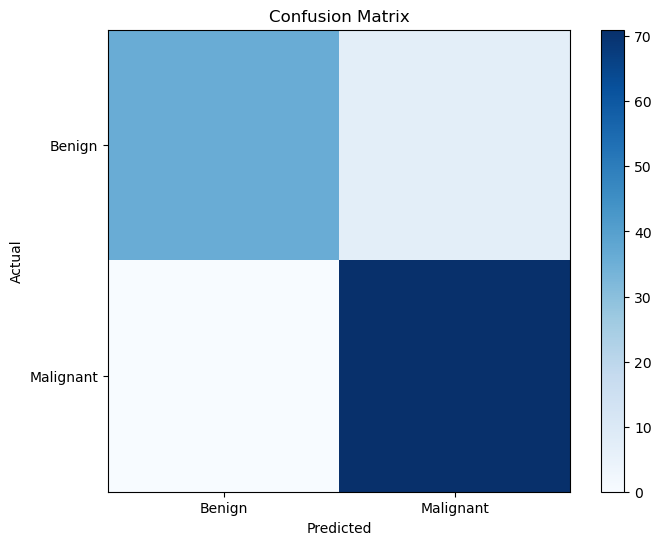

In [5]:
# Plot a confusion matrix heatmap
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Benign', 'Malignant'])
plt.yticks(tick_marks, ['Benign', 'Malignant'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [6]:
# Save the model to a file using pickle
with open('neural_network_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Load the model from the file
with open('neural_network_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)